## Summary

In this notebook, we've explored:

1. **Probability Distributions**: How to create and sample from categorical distributions using PyTorch
2. **Built-in Random Number Generation**: Using NumPy's random functions for generating uniform random numbers
3. **Custom PRNG Implementation**: Building our own Linear Congruential Generator to understand the mechanics of random number generation
4. **Distribution Comparison**: Visualizing how different random number generators produce similar uniform distributions

### Key Takeaways
- Random number generators are actually pseudo-random - they use deterministic algorithms to produce sequences that appear random
- Different algorithms can produce similar statistical properties
- Understanding the underlying mechanics helps in choosing appropriate tools for different applications

### Next Steps
In the following notebooks, we'll explore more complex probability distributions, statistical measures, and their applications in data science.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Introduction to Probability and Statistics

This notebook introduces fundamental concepts in probability theory and demonstrates how to generate random numbers using Python. We'll explore both built-in random number generators and implement our own simple pseudo-random number generator (PRNG).

## Learning Objectives
- Understand probability distributions and sampling
- Learn how random number generation works
- Implement a simple PRNG
- Compare different random number generators

Let's start by importing the necessary libraries:

## Probability Distributions and Sampling

Let's start with a simple example of creating a probability distribution over characters. We'll create a categorical distribution where certain vowels have higher probabilities:

In [2]:
first_4_chars = "appl"

probs = np.zeros(27) # 26 letters + space (EOS)

# Store i to s
itos = list("abcdefghijklmnopqrstuvwxyz ")

# stoi 
stoi = {char: i for i, char in enumerate(itos)}

# Fill in the probabilities
probs[stoi["a"]] = 0.1
probs[stoi["e"]] = 0.3
probs[stoi["i"]] = 0.2
probs[stoi["o"]] = 0.1
probs[stoi["u"]] = 0.05
probs[stoi[" "]] = 0.05

probability_distribution = torch.distributions.Categorical(torch.tensor(probs))


Now let's sample from this distribution to see which character gets selected:

In [4]:
sample = probability_distribution.sample()
print(f"Sampled character: {itos[sample]}")

Sampled character: a


## Random Number Generation with NumPy

NumPy provides built-in functions for generating random numbers from various distributions. Let's generate random numbers from a uniform distribution:

[0.18872185 0.29419573 0.05307716 0.4139927  0.80335078 0.64528118
 0.4575413  0.76490687 0.53933945 0.3135855 ]


(array([100.,  86., 105.,  99., 102.,  90., 105., 106., 104., 103.]),
 array([0.00367548, 0.10305437, 0.20243325, 0.30181214, 0.40119103,
        0.50056992, 0.59994881, 0.6993277 , 0.79870659, 0.89808548,
        0.99746437]),
 <BarContainer object of 10 artists>)

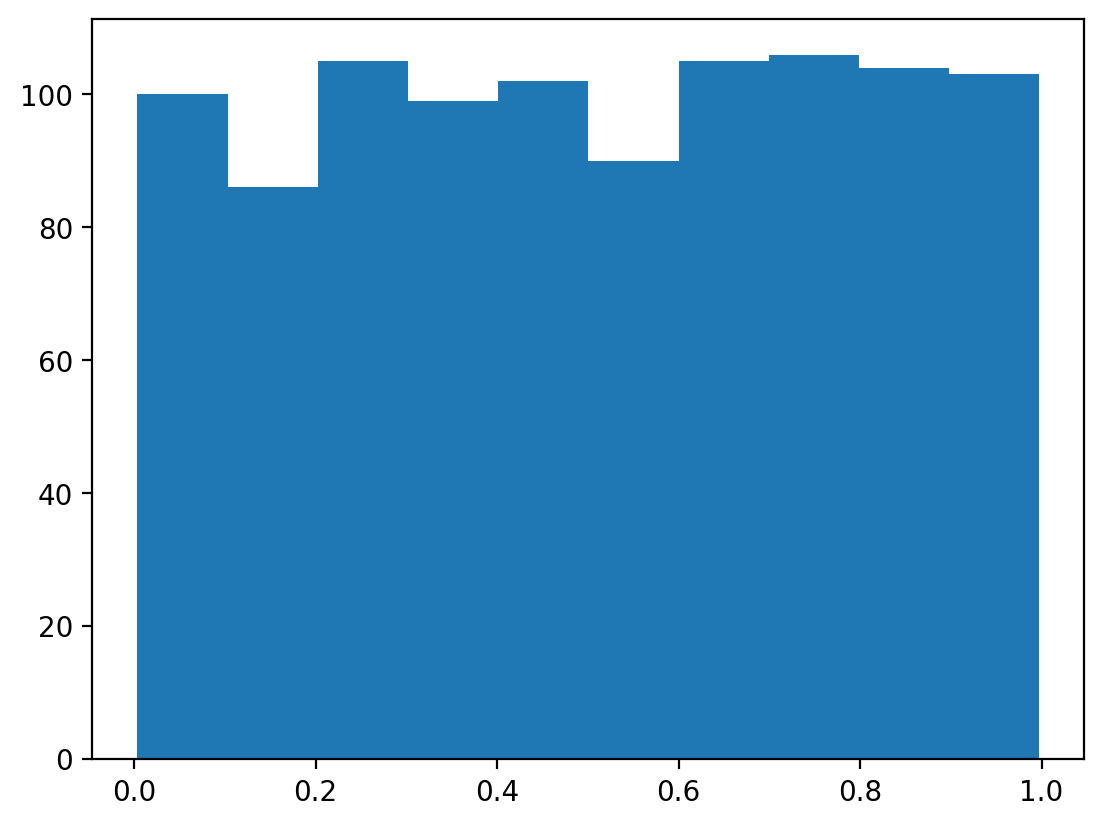

In [11]:
samples_numpy = np.random.uniform(0, 1, 1000)
print(samples_numpy[:10])
plt.hist(samples_numpy)

## Implementing a Simple Pseudo-Random Number Generator (PRNG)

To understand how random number generation works under the hood, let's implement our own simple PRNG using a Linear Congruential Generator (LCG). This is one of the oldest and most well-studied PRNG algorithms:

In [23]:
class SimplePRNG:
    def __init__(self, seed=42):
        # Initialize the generator with a seed
        self.modulus = 2**31 - 1  # Large prime modulus
        self.multiplier = 1664525
        self.increment = 1013904223
        self.state = seed

    def uniform(self, low=0.0, high=1.0, size=None):
        # Generate random numbers in the range [low, high)
        if size is None:
            size = 1  # Default to a single number if size is None
        if isinstance(size, int):
            size = (size,)  # Convert size to tuple

        # Generate random numbers
        random_numbers = np.empty(size)
        for idx in np.ndindex(size):
            self.state = (self.multiplier * self.state + self.increment) % self.modulus
            random_numbers[idx] = low + (high - low) * (self.state / self.modulus)

        return random_numbers 

# Example usage:
prng = SimplePRNG(seed=12345)
print(prng.uniform(0, 1, 50))  

[0.04080538 0.04087837 0.54709049 0.26713204 0.42986223 0.90642683
 0.59240588 0.8643601  0.45993872 0.96243078 0.56511522 0.88322526
 0.98992417 0.00597593 0.55550726 0.19979239 0.90062773 0.84657695
 0.96436855 0.03375009 0.34428985 0.54191328 0.67693687 0.81460587
 0.30590164 0.39907677 0.73545432 0.56768856 0.26844794 0.78549411
 0.06020346 0.63806449 0.76347271 0.89276656 0.72407304 0.15397659
 0.35789549 0.46641842 0.58988864 0.86842092 0.80445417 0.54725703
 0.48183308 0.68513887 0.24797944 0.44857785 0.52156459 0.77294949
 0.22528635 0.23579403]


In [24]:
samples_our_prng = prng.uniform(0, 1, 1000)

(array([ 96.,  94., 101.,  98.,  92.,  97., 107., 129.,  81., 105.]),
 array([0.00156537, 0.10117911, 0.20079286, 0.30040661, 0.40002035,
        0.4996341 , 0.59924785, 0.69886159, 0.79847534, 0.89808909,
        0.99770283]),
 <BarContainer object of 10 artists>)

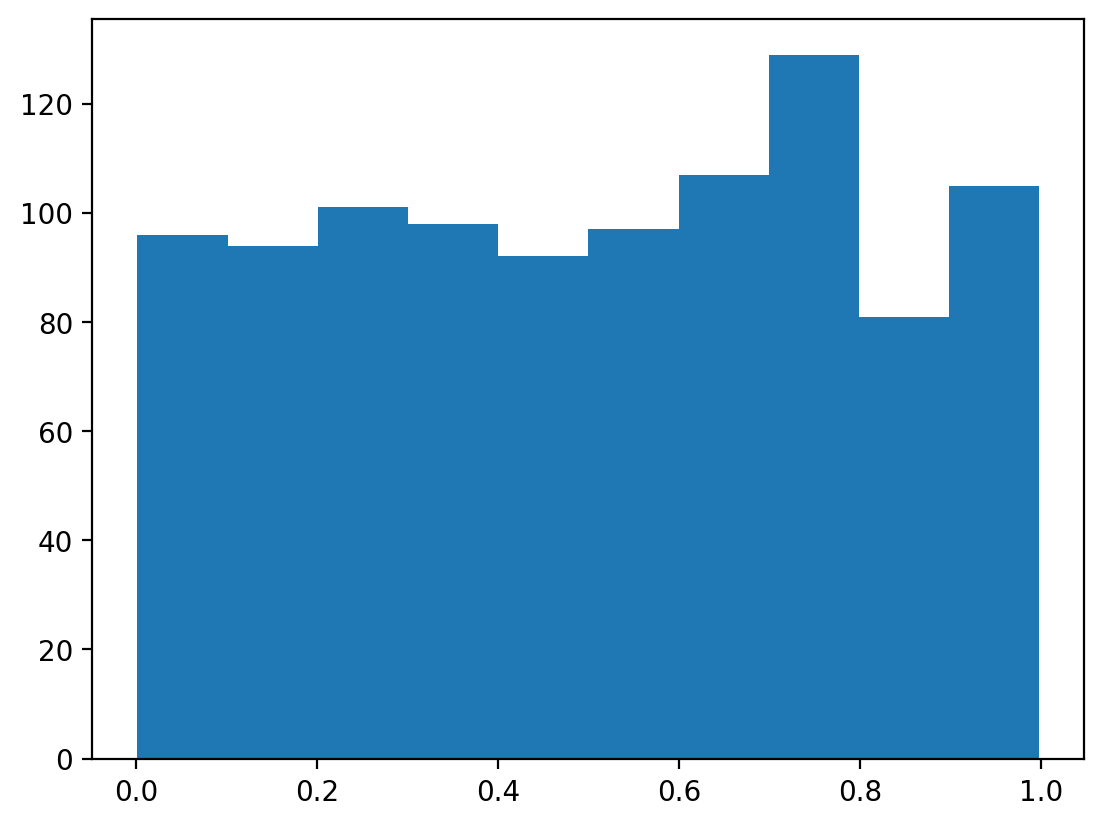

In [25]:
plt.hist(samples_our_prng)

Let's generate more samples and visualize the distribution:

## Comparing Distributions

Let's visualize how our custom PRNG compares to NumPy's built-in generator: